**About the business**

The bike sharing business service where bikes are made available for shared use for individuals for a price. The bike can be picked up from a dock and returned to another dropping dock. The business thrives on volume game and seasonality impacts the revenue.

Goal / Objective: 
From the given data which is collected from the sales team (along the seasonal data), a model to be build to see how the count of bikes are impacted by different variables. Specifically the management want to know the factors affecting the demand for the bikes, which variable are significant in predicting the demand for shared bikes, and how well those variables describe the bike demands.




In [1]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline

In [2]:
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [3]:
import warnings
warnings.filterwarnings('ignore')

**Basic data checking** - Here we import the data and do the checking 

In [4]:
bike=pd.read_csv('../input/rental-bike-sharing/day.csv', parse_dates=["dteday"])
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [6]:
bike.shape

(731, 16)

The data set have 16 columns and 731 rows.

In [7]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

On Data type, we have datetime, Float and interger

In [8]:
# Checking for null values
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
#checking for duplicates
bike_dup=bike
bike_dup.drop_duplicates(subset=None, inplace=True)
bike_dup.shape

(731, 16)

- there are no duplicates, as the rows are same as shape.

** Data Preperation**
The data to be cleaned interms of parameters before creating the models.

In [10]:
#rename the columns
bike.rename(columns={'dteday':'Date','yr':'Year','mnth':'month','hum':'humidity','cnt':'count'},inplace =True)
bike.head()

,instant,Date,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


- Here the variables to be mapped for better understanding and for model preperation

In [11]:
#mapping the vars - season,month,weathersit,weekday
bike['season']=bike.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter'})
bike['month']=bike.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike['weathersit']=bike.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
bike['weekday']=bike.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
bike.head()

,instant,Date,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,spring,0,Jan,0,Sat,0,Mist + Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,0,Jan,0,Sun,0,Mist + Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,0,Jan,0,Mon,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,0,Jan,0,Tue,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,0,Jan,0,Wed,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Data Visualisation**
Here exploratory data analysis to be done to understand the data and business problem


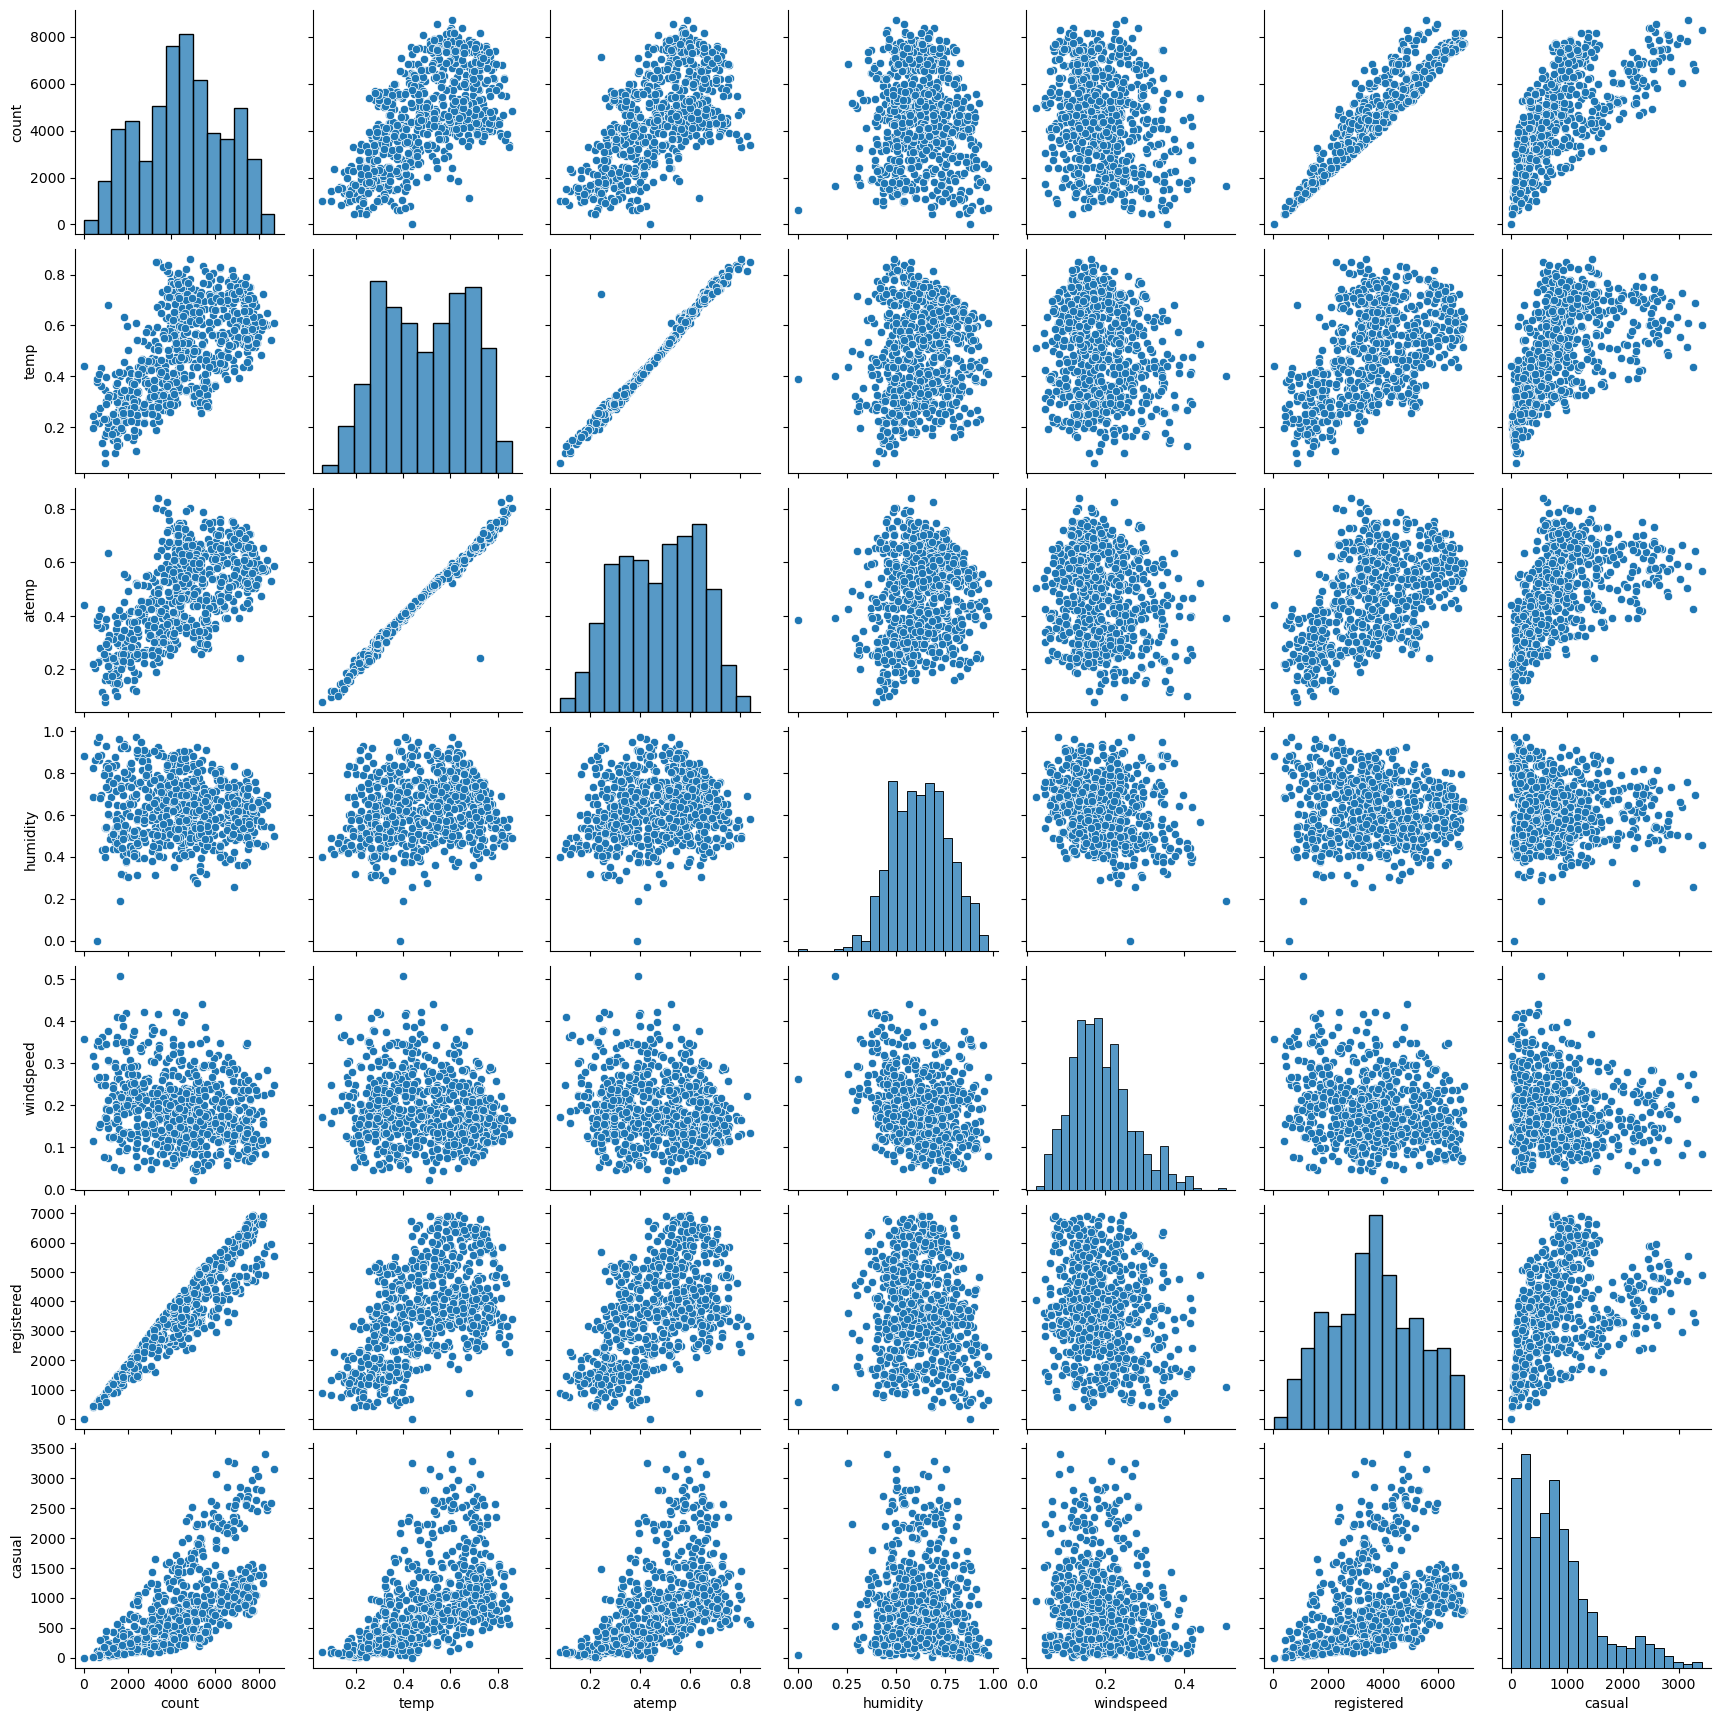

In [12]:
#pairplot for numeric variables
sns.pairplot(bike,vars = ['count',"temp",'atemp', "humidity",'windspeed','registered','casual'])
plt.show()

Here if we look closely, we can observe
1. Total count of the bikes are corelated to Temperature
2. Total count is not influenced with Windspeed,humidity 

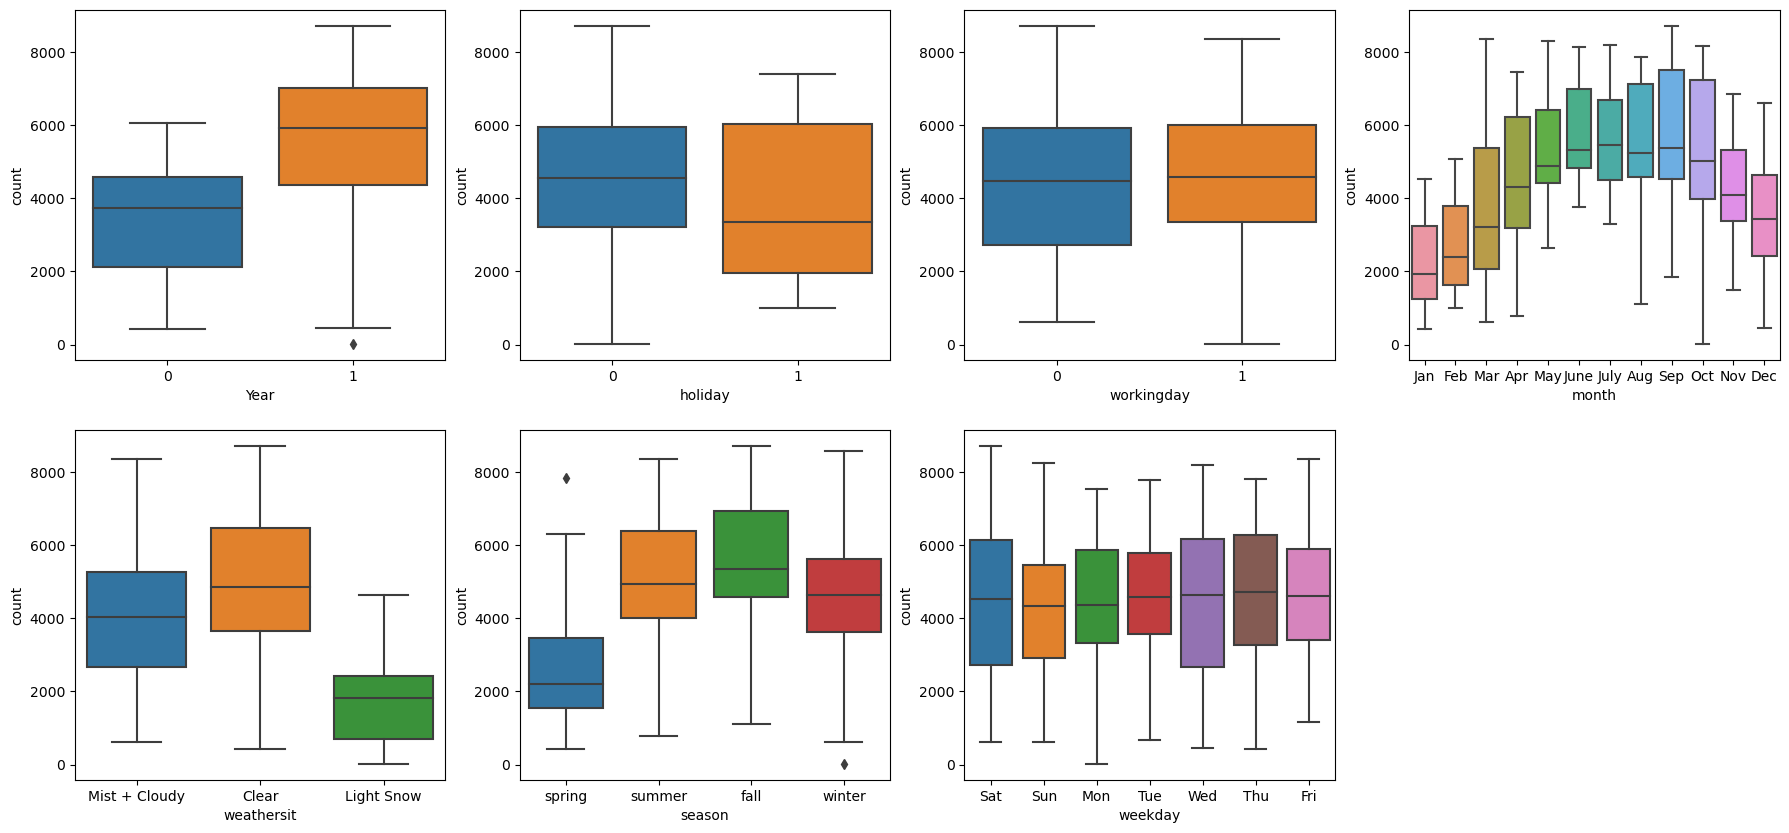

In [13]:
# scatter plot for categorical vars
plt.figure(figsize=(22, 10))

plt.subplot(2,4,1)
sns.boxplot(x = 'Year', y = 'count', data = bike)

plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'count', data = bike)

plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'count', data = bike)

plt.subplot(2,4,4)
sns.boxplot(x = 'month', y = 'count', data = bike)

plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'count', data = bike)

plt.subplot(2,4,6)
sns.boxplot(x = 'season', y = 'count', data = bike)

plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'count', data = bike)

plt.show()

 - More bike rentals in 2019
 - Equal bike rentals in hoidays / non-holidays
 - Working days doesn't matter
 - Peaked on Aug to Oct
 - More rentals on Clear weather
 - More rentals on fall

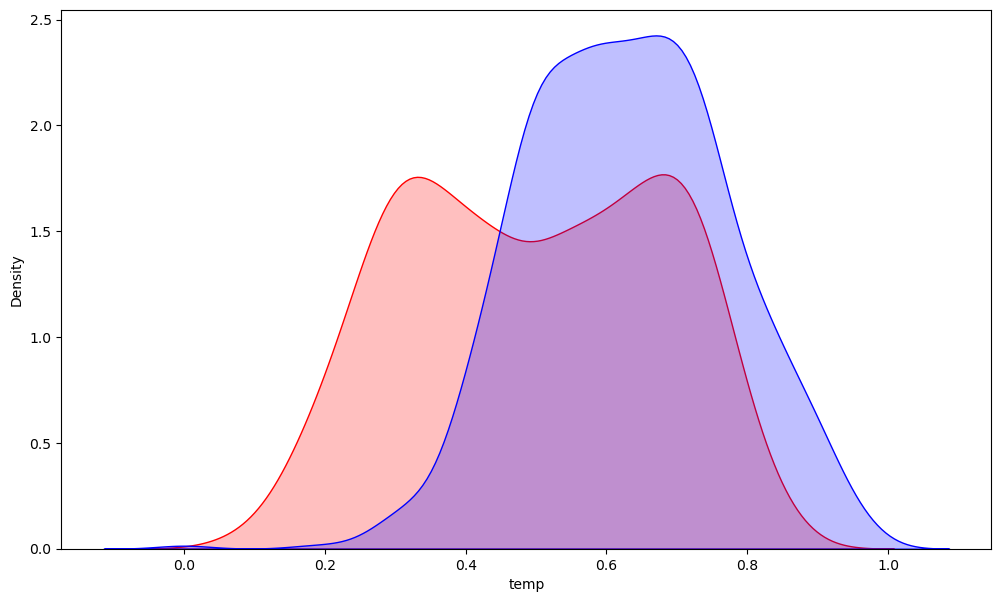

In [14]:
plt.figure(figsize=(12,7))
sns.kdeplot(bike['temp'],shade = True, color = 'r');
sns.kdeplot(bike['humidity'], shade = True, color = 'b');

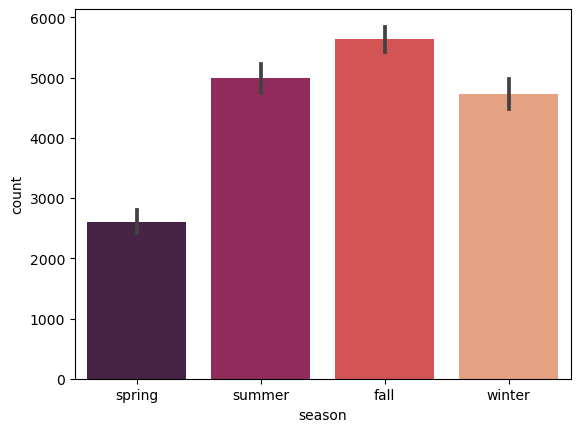

In [15]:
sns.barplot(x='season',y='count',data=bike,palette="rocket",)
plt.show()

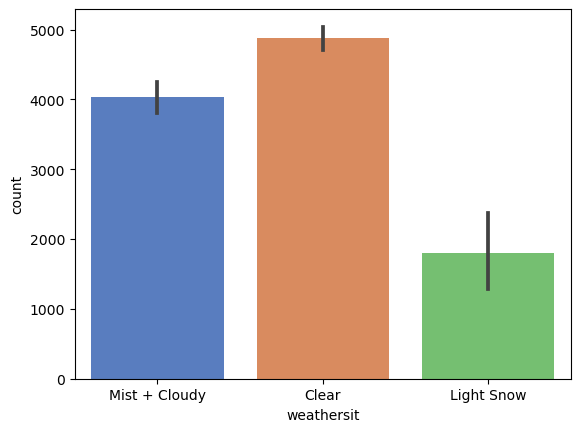

In [16]:
#Relation between weather and count of bike rentals
sns.barplot(x='weathersit',y='count',palette="muted",data=bike)
plt.show()

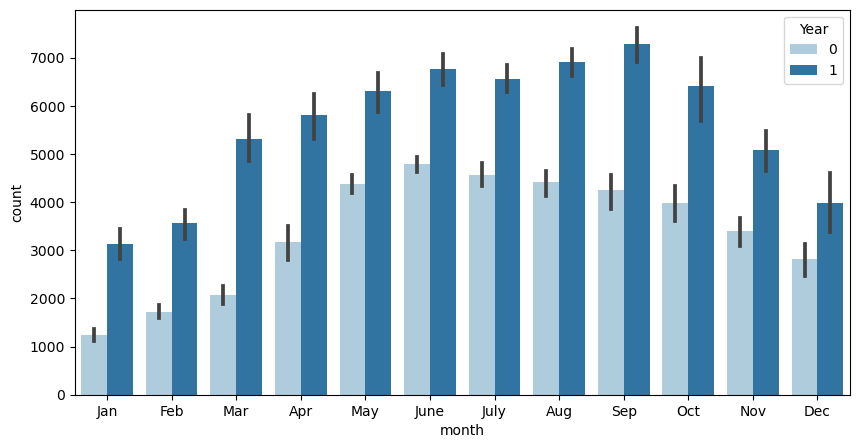

In [17]:
#Relation between month and total bikes
plt.figure(figsize=(10,5))
sns.barplot(x='month',y='count',hue='Year',data=bike,palette='Paired')
plt.show()

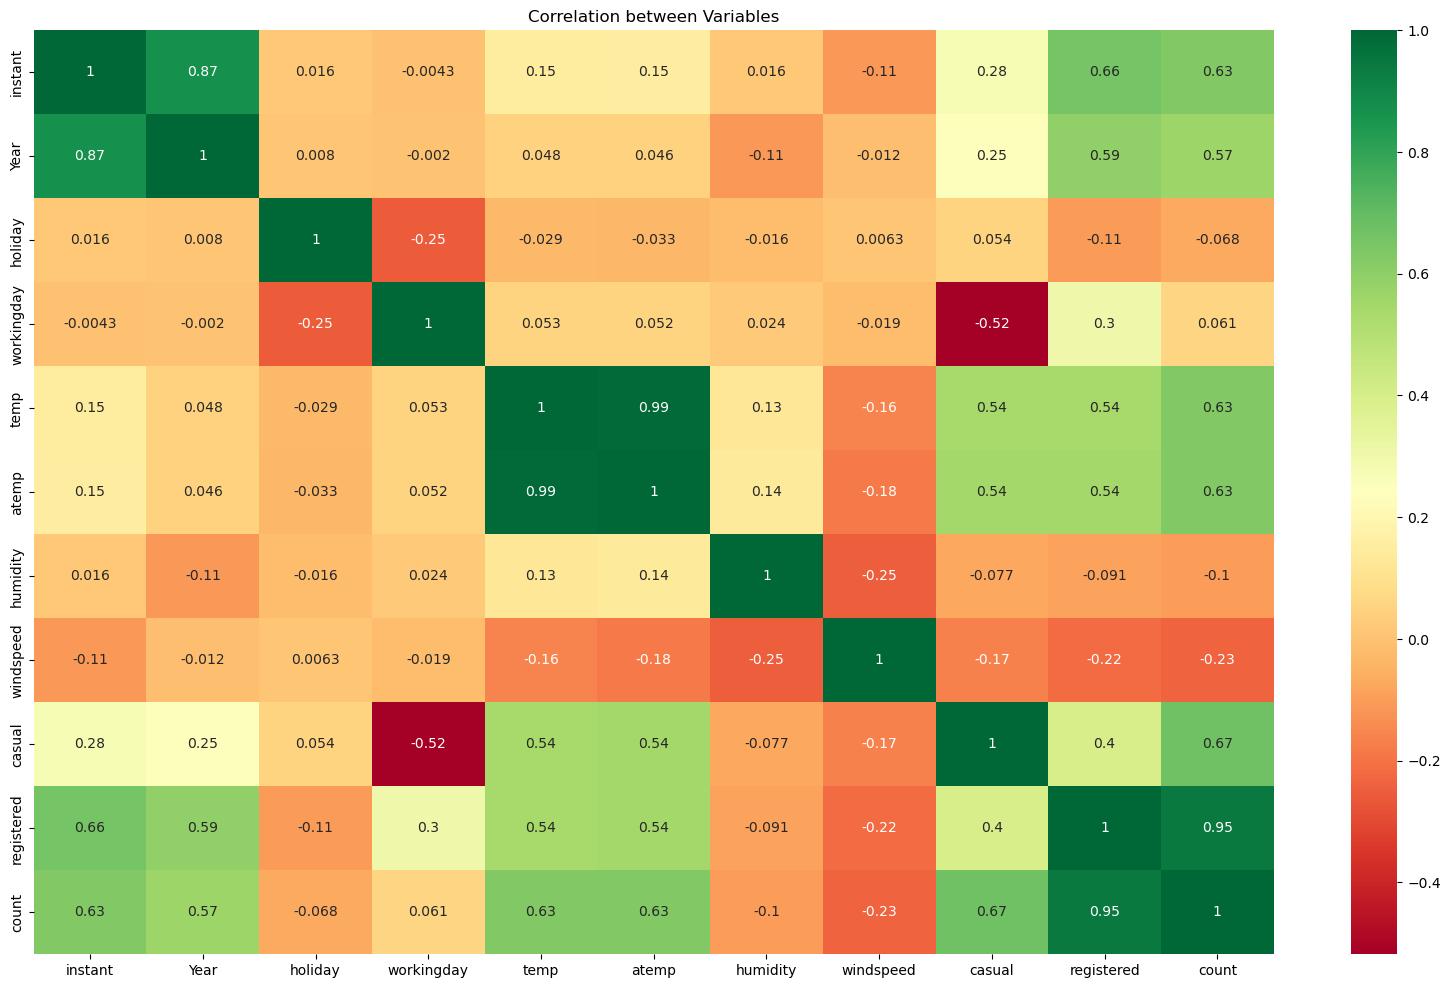

In [18]:
#Heatmap to see correlation between variables
plt.figure(figsize=(20, 12))
sns.heatmap(bike.corr(), cmap='RdYlGn', annot = True)
plt.title("Correlation between Variables")
plt.show()

**Model Building**
- remove unwanted variables before the model building
- Create dummy variables
- Split the data to train / test
- rescaling the data
- Model building
- Recurring FEature Elimination
- Iteration of models based on the stats values

In [19]:
#dropping the unwanted variables - instant, date, casual, registered
bike.drop(['Date', 'instant','casual','registered'],axis=1, inplace=True)
bike.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,0.344167,0.363625,0.805833,0.160446,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,0.363478,0.353739,0.696087,0.248539,801
2,spring,0,Jan,0,Mon,1,Clear,0.196364,0.189405,0.437273,0.248309,1349
3,spring,0,Jan,0,Tue,1,Clear,0.200000,0.212122,0.590435,0.160296,1562
4,spring,0,Jan,0,Wed,1,Clear,0.226957,0.229270,0.436957,0.186900,1600


In [20]:
# creating dummy variables
months=pd.get_dummies(bike.month,drop_first=True)
weekdays=pd.get_dummies(bike.weekday,drop_first=True)
weather_sit=pd.get_dummies(bike.weathersit,drop_first=True)
seasons=pd.get_dummies(bike.season,drop_first=True)

#combining the new dummy vars to the new df
bike=pd.concat([months,weekdays,weather_sit,seasons,bike],axis=1)
bike.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Sat,0,Mist + Cloudy,0.344167,0.363625,0.805833,0.160446,985
1,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Sun,0,Mist + Cloudy,0.363478,0.353739,0.696087,0.248539,801
2,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Mon,1,Clear,0.196364,0.189405,0.437273,0.248309,1349
3,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Tue,1,Clear,0.200000,0.212122,0.590435,0.160296,1562
4,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Wed,1,Clear,0.226957,0.229270,0.436957,0.186900,1600


In [21]:
#dropping regular variables which is made to dummy 
bike.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
bike.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,summer,winter,Year,holiday,workingday,temp,atemp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0.344167,0.363625,0.805833,0.160446,985
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0.363478,0.353739,0.696087,0.248539,801
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0.196364,0.189405,0.437273,0.248309,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0.200000,0.212122,0.590435,0.160296,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0.226957,0.229270,0.436957,0.186900,1600


In [22]:
#final shape
bike.shape

(731, 30)

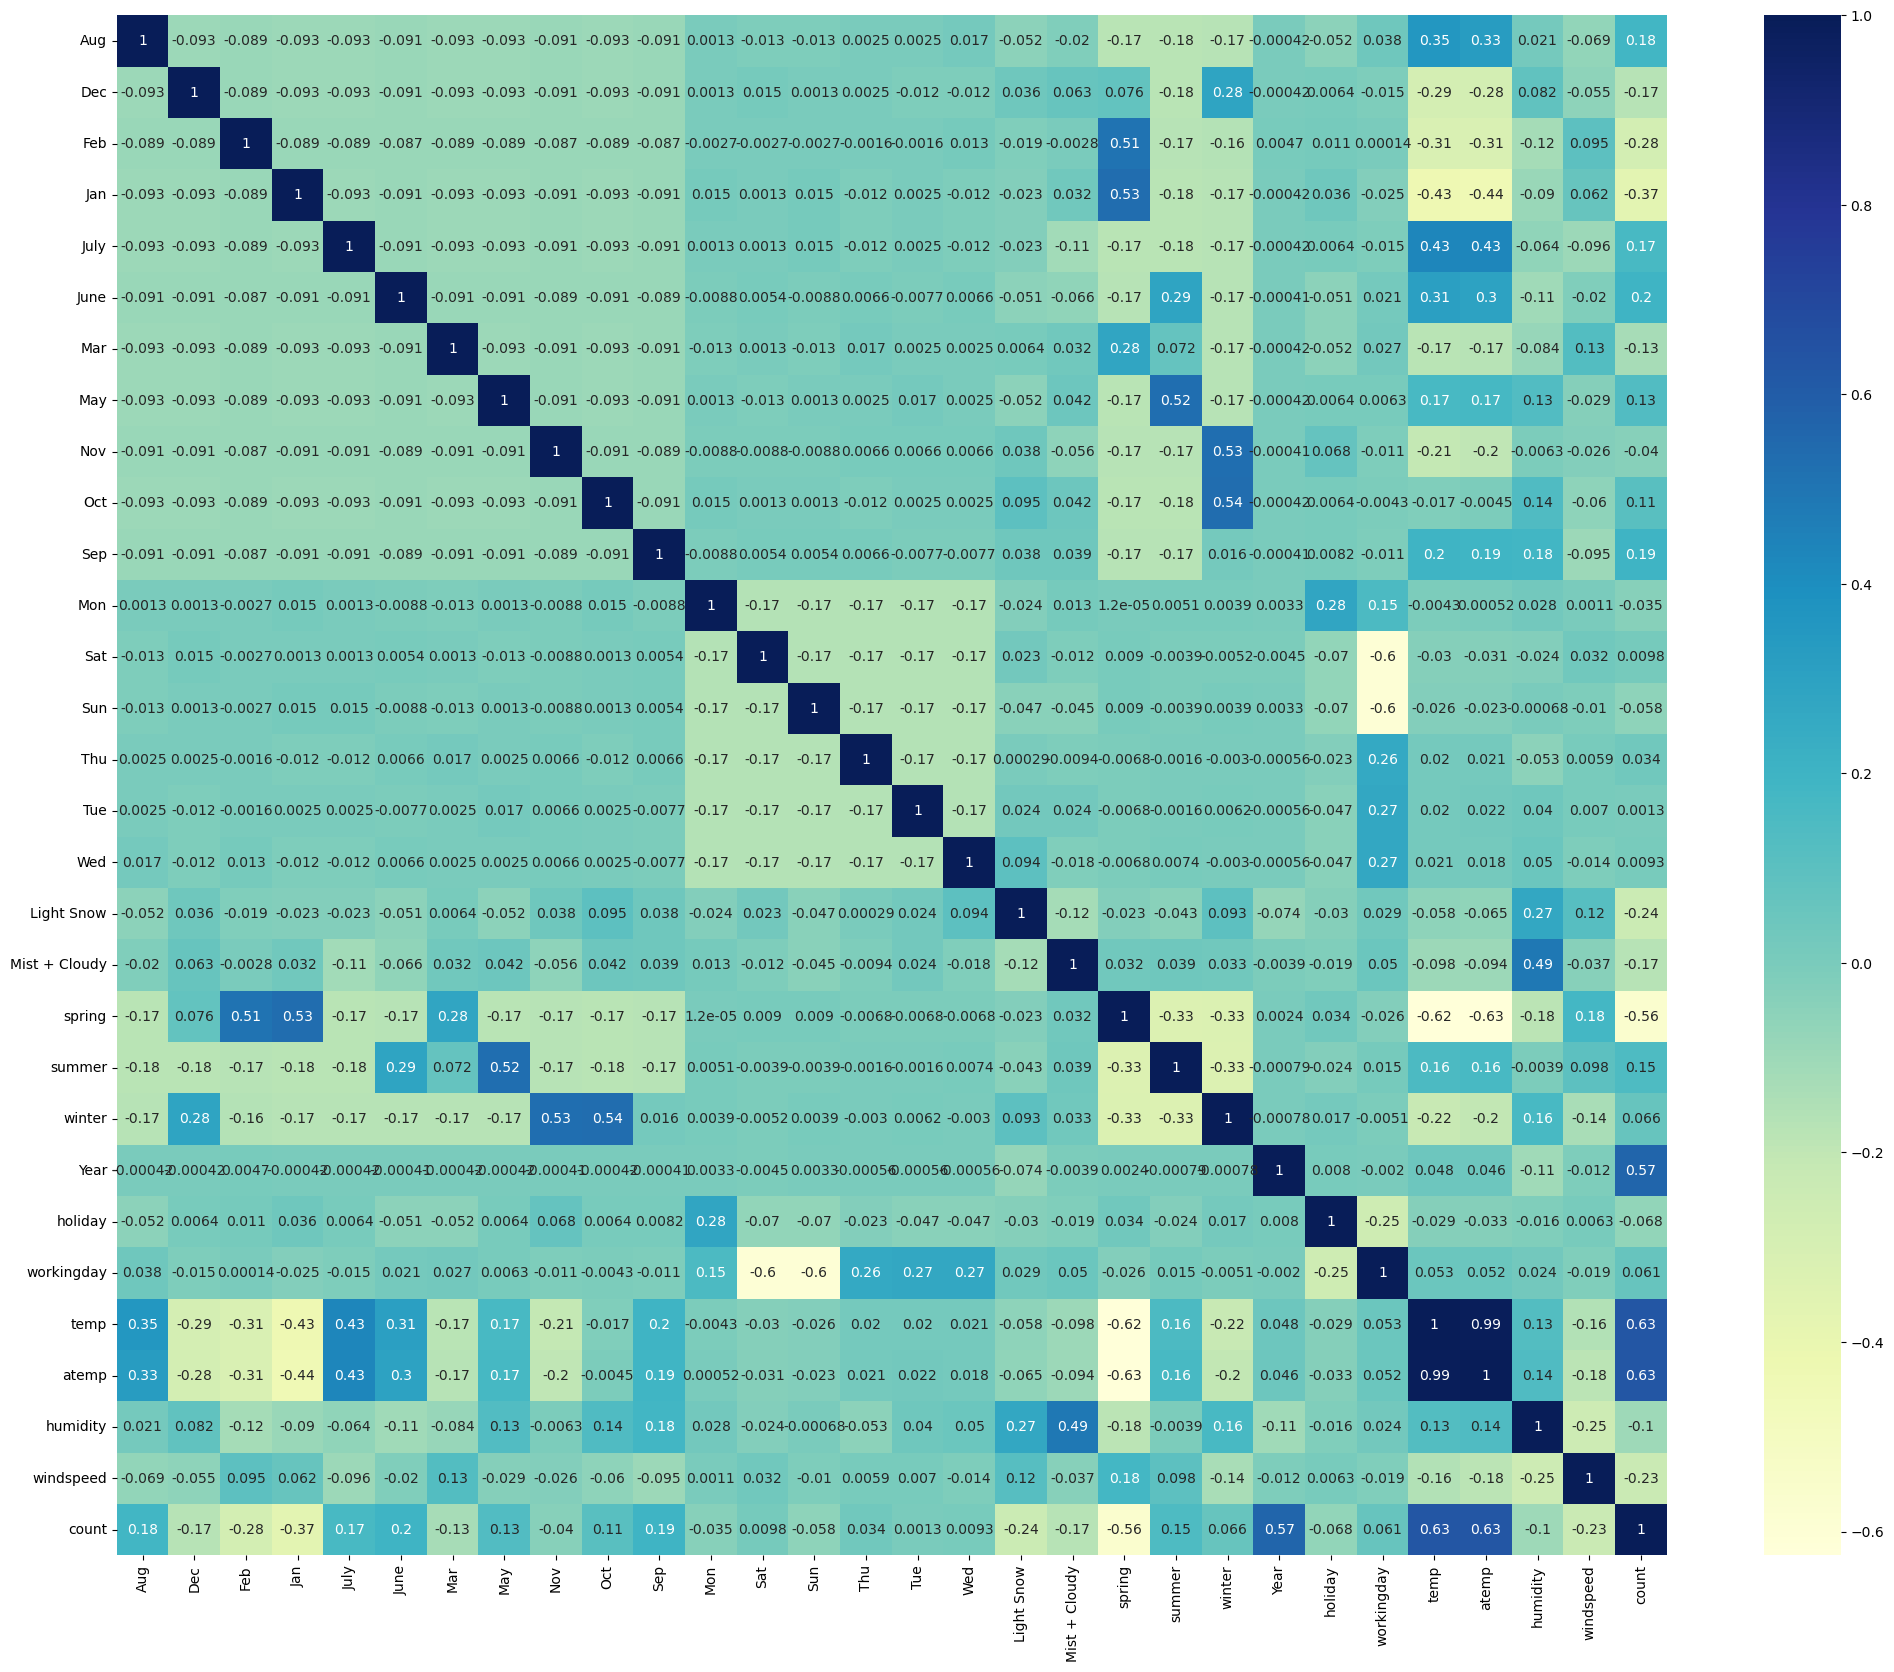

In [23]:
#checking the correlation again
#Heatmap to see correlation between variables

plt.figure(figsize=(25, 20))
sns.heatmap(bike.corr(), cmap='YlGnBu', annot = True)
plt.show()

In [24]:
#split the data to train & test
#splitting the data set for train & test
bike_train, bike_test = train_test_split(bike,train_size=0.7,random_state= 100)

In [25]:
#check the ratio
print(bike_train.shape)
print(bike_test.shape)

(511, 30)
(220, 30)


**Rescaling the data**
- We will be using MinMax scaler

In [26]:
#minMax the scale 
scaler=MinMaxScaler()
#Create a list of numeric variables
num_vars=['temp','atemp','humidity','windspeed','count']

#fit on data
bike_train[num_vars]=scaler.fit_transform(bike_train[num_vars])
bike_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,summer,winter,Year,holiday,workingday,temp,atemp,humidity,windspeed,count
576,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0.836974,0.795348,0.689137,0.239301,0.814887
426,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0.366591,0.368552,0.677114,0.220569,0.364933
729,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0.496388,0.490358,0.413052,0.656397,0.714565
111,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095


In [27]:
bike_train.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,summer,winter,Year,holiday,workingday,temp,atemp,humidity,windspeed,count
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.095890,0.084149,0.068493,0.088063,0.078278,0.074364,0.097847,0.084149,0.086106,0.086106,...,0.246575,0.248532,0.508806,0.023483,0.667319,0.536606,0.512443,0.648573,0.317963,0.515061
std,0.294729,0.277883,0.252838,0.283664,0.268872,0.262619,0.297399,0.277883,0.280795,0.280795,...,0.431440,0.432585,0.500412,0.151581,0.471635,0.227231,0.213364,0.148691,0.165339,0.225338
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.338036,0.332910,0.534994,0.199179,0.356765
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.530654,0.516885,0.653499,0.294121,0.519903
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.735215,0.684716,0.755689,0.406058,0.691498
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


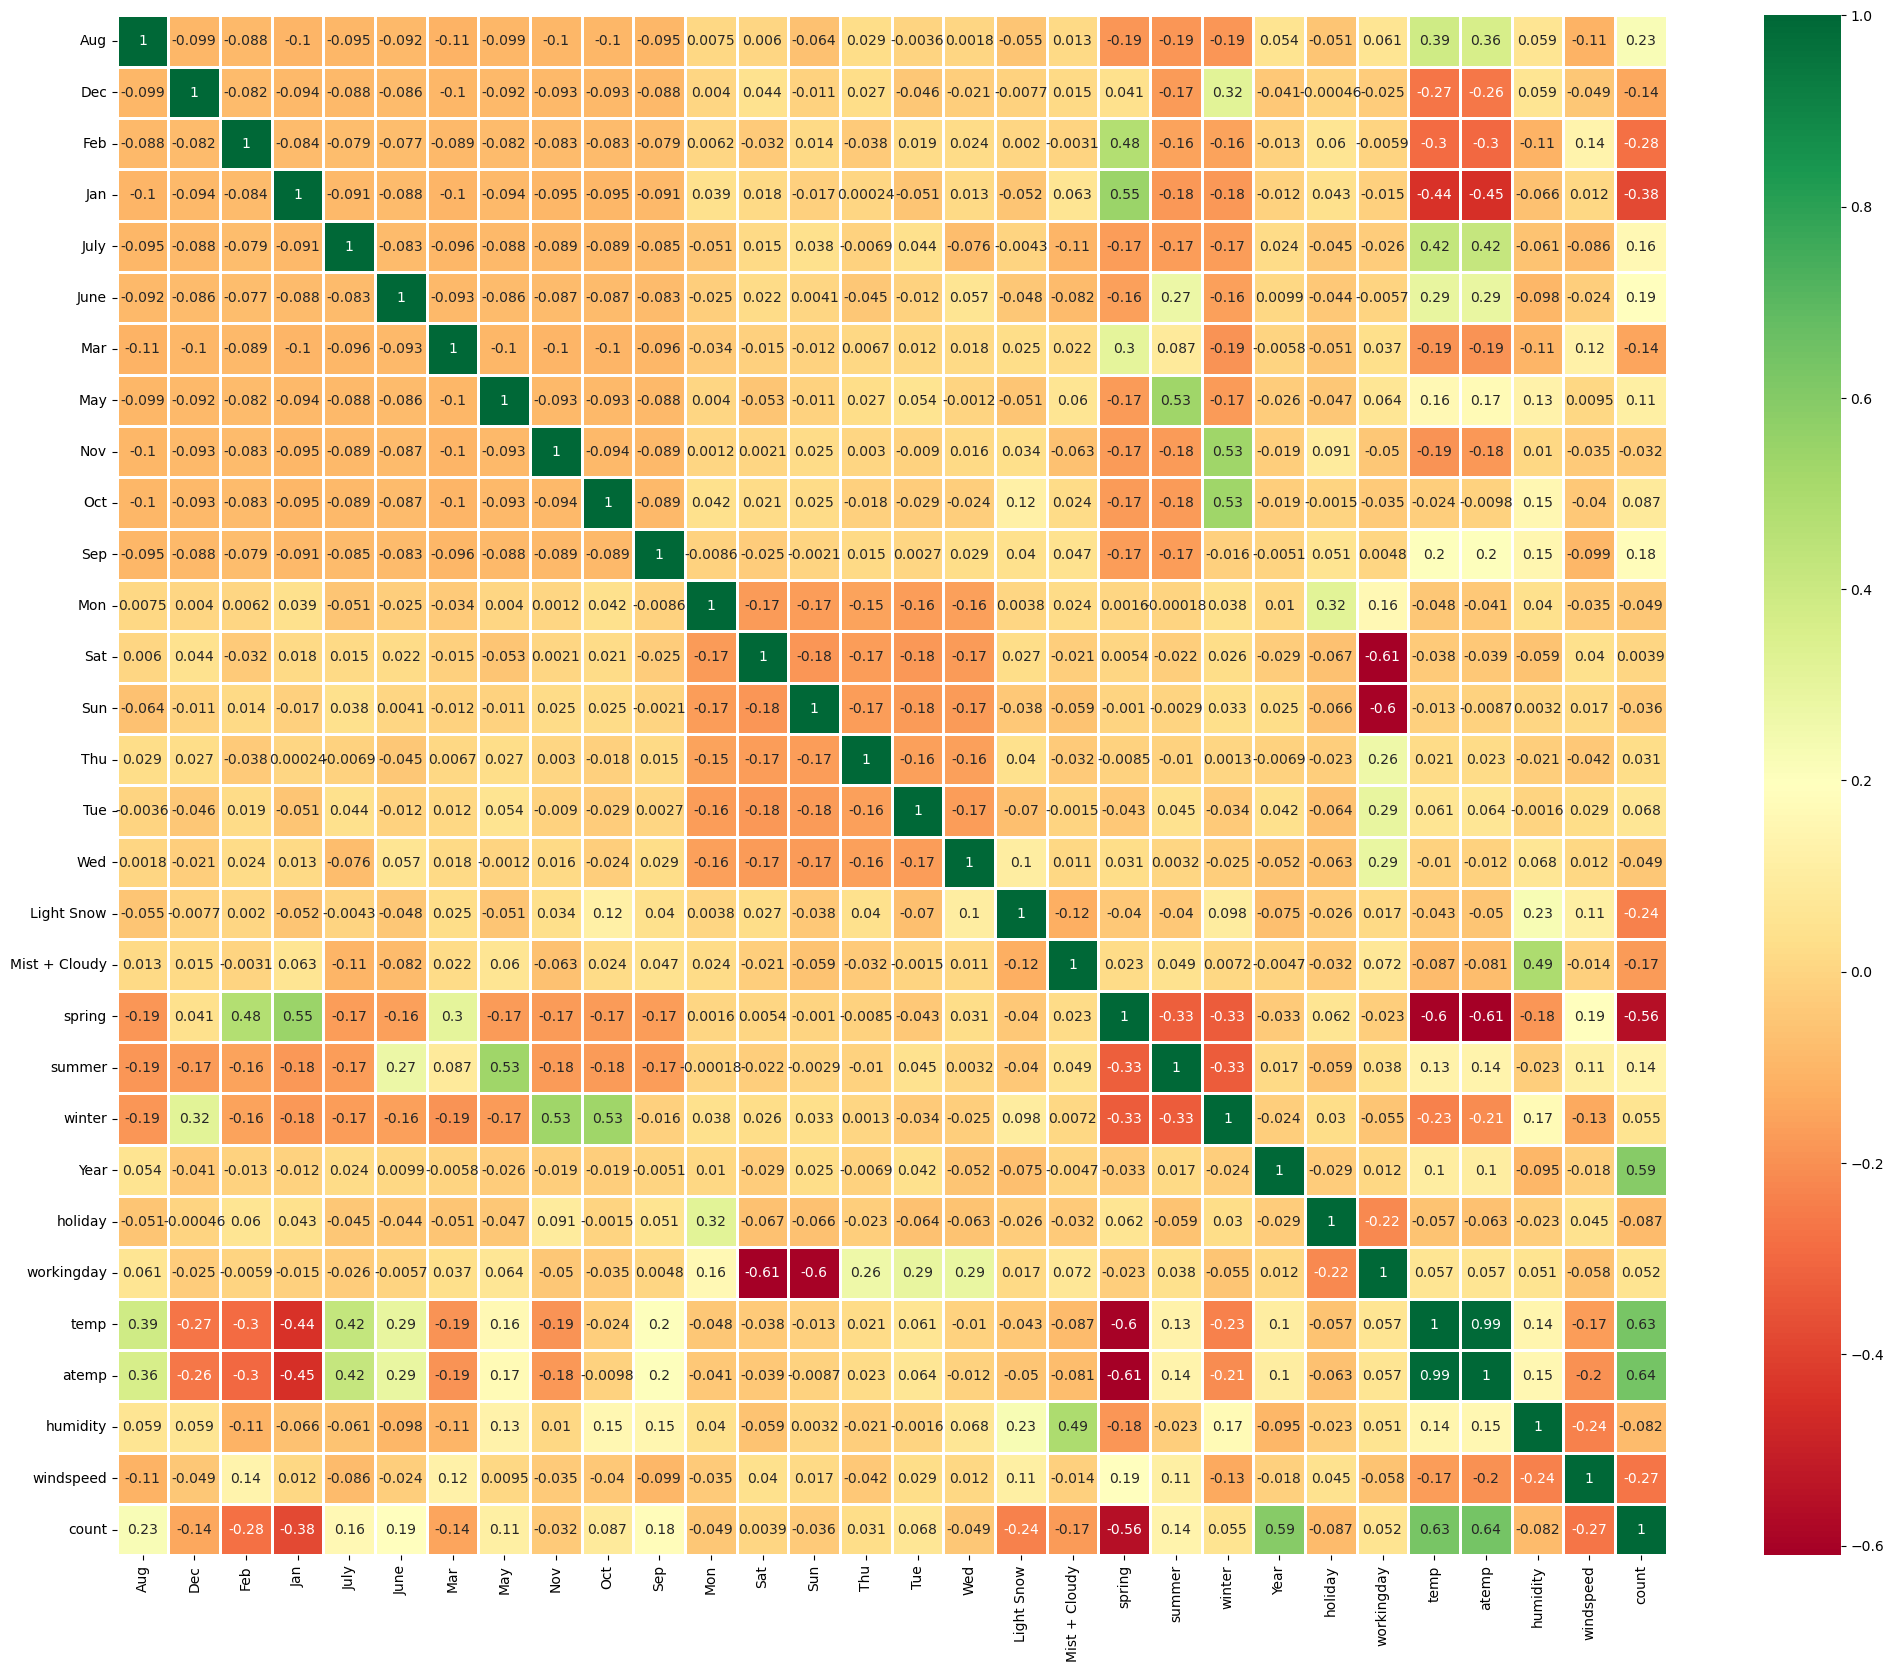

In [28]:
# heat map to check collinearity
plt.figure(figsize = (25,20))
ax= sns.heatmap(bike_train.corr(), annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

 - There is multi collinearity between variables
 - There is temp vs atemp high correlation. We can take one value
 - Spring have -ve correlation 
 - Jan, feb have -ve correlation there on total counts
 - various months have correlation there.

**Model Building**

In [29]:
# X_train & y_train
y_train= bike_train.pop('count')
X_train=bike_train

**Recurring Feature Elimination**
Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached.

In [30]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [31]:
#running RFE with o/p number of variable equal to 15
lm=LinearRegression()
lm.fit(X_train,y_train)



LinearRegression()

In [32]:
#running RFE with o/p number of variable equal to 15
rfe=RFE(lm,n_features_to_select=15) # running RFE
rfe=rfe.fit(X_train,y_train)

In [33]:
# see the list of variables 
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Aug', False, 12),
 ('Dec', True, 1),
 ('Feb', False, 3),
 ('Jan', False, 2),
 ('July', True, 1),
 ('June', False, 11),
 ('Mar', False, 13),
 ('May', False, 5),
 ('Nov', True, 1),
 ('Oct', False, 10),
 ('Sep', False, 4),
 ('Mon', False, 7),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 15),
 ('Tue', False, 9),
 ('Wed', False, 14),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', False, 6),
 ('winter', True, 1),
 ('Year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 8),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [34]:
# RFE selected variabbles
col=X_train.columns[rfe.support_]
col

Index(['Dec', 'July', 'Nov', 'Sat', 'Sun', 'Light Snow', 'Mist + Cloudy',
       'spring', 'winter', 'Year', 'holiday', 'workingday', 'temp', 'humidity',
       'windspeed'],
      dtype='object')

In [35]:
X_train.columns[~rfe.support_]

Index(['Aug', 'Feb', 'Jan', 'June', 'Mar', 'May', 'Oct', 'Sep', 'Mon', 'Thu',
       'Tue', 'Wed', 'summer', 'atemp'],
      dtype='object')

**Building Model Using Stats**

In [36]:
X_train_rfe=X_train[col]

In [37]:
# Function for VIF Calculation

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

***Model 1***

The Variance Inflation Factor (VIF) is a measure of colinearity among predictor variables within a multiple regression
Higher VIF parameter means high multi colinearity. So the parameters whith High VIF can be removed

In [38]:
#calculate VIF in a df to analyse the data 
calculateVIF(X_train_rfe)

,Features,VIF
11,workingday,39.11
4,Sun,9.98
3,Sat,9.69
12,temp,3.14
7,spring,2.57
10,holiday,2.46
8,winter,2.34
13,humidity,1.89
2,Nov,1.66
6,Mist + Cloudy,1.61


In [39]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     195.2
Date:                Sat, 22 Apr 2023   Prob (F-statistic):          2.15e-191
Time:                        08:43:42   Log-Likelihood:                 515.56
No. Observations:                 511   AIC:                            -1001.
Df Residuals:                     496   BIC:                            -937.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2759      0.025     11.078

***Model Optimising Process***
- For further model creation, we will remove the high p value variables and do some iterations to get optimum values.
- Since this is first model to learn about the stats and fundamentals, we will not use other Algorithms that automates the Parameter selections
- Either VIF or P value can be reduced based on your judgement.
- Here I'm giving preference to statistical values, so P values is given importance first


**Model 2**
- Holiday have high P value, so it is removed.

In [40]:
X_train_new = X_train_rfe.drop(['holiday'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
12,humidity,29.29
11,temp,17.61
10,workingday,16.81
4,Sun,4.71
13,windspeed,4.68
3,Sat,4.59
8,winter,3.02
7,spring,2.83
6,Mist + Cloudy,2.38
9,Year,2.09


In [41]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     195.2
Date:                Sat, 22 Apr 2023   Prob (F-statistic):          2.15e-191
Time:                        08:43:43   Log-Likelihood:                 515.56
No. Observations:                 511   AIC:                            -1001.
Df Residuals:                     496   BIC:                            -937.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3040      0.041      7.497

**Model 3**
- Remove "sun" for the high P value

In [42]:
X_train_new2 = X_train_new.drop(['Sun'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new2)

,Features,VIF
11,humidity,23.56
10,temp,16.28
9,workingday,4.43
12,windspeed,4.25
7,winter,2.96
6,spring,2.63
5,Mist + Cloudy,2.32
8,Year,2.06
2,Nov,1.78
3,Sat,1.78


In [43]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new2)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     210.2
Date:                Sat, 22 Apr 2023   Prob (F-statistic):          2.33e-192
Time:                        08:43:43   Log-Likelihood:                 515.07
No. Observations:                 511   AIC:                            -1002.
Df Residuals:                     497   BIC:                            -942.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3285      0.032     10.301

***Model 4***
- The P values are optimised now
- Removing the high VIF now
- "humidity" with high VIF to be removed

In [44]:
X_train_new3 = X_train_new2.drop(['humidity'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new3)

,Features,VIF
10,temp,6.37
9,workingday,4.31
11,windspeed,4.25
7,winter,2.53
8,Year,2.06
6,spring,1.87
3,Sat,1.76
2,Nov,1.75
5,Mist + Cloudy,1.56
0,Dec,1.42


In [45]:
#Add a constant
X_train_lm1 = sm.add_constant(X_train_new3)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.7
Date:                Sat, 22 Apr 2023   Prob (F-statistic):          1.05e-189
Time:                        08:43:44   Log-Likelihood:                 505.96
No. Observations:                 511   AIC:                            -985.9
Df Residuals:                     498   BIC:                            -930.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2451      0.026      9.588

***Mid Way Analyis***
- All high P values removed
- High VIF also removed
- checking for correlation 

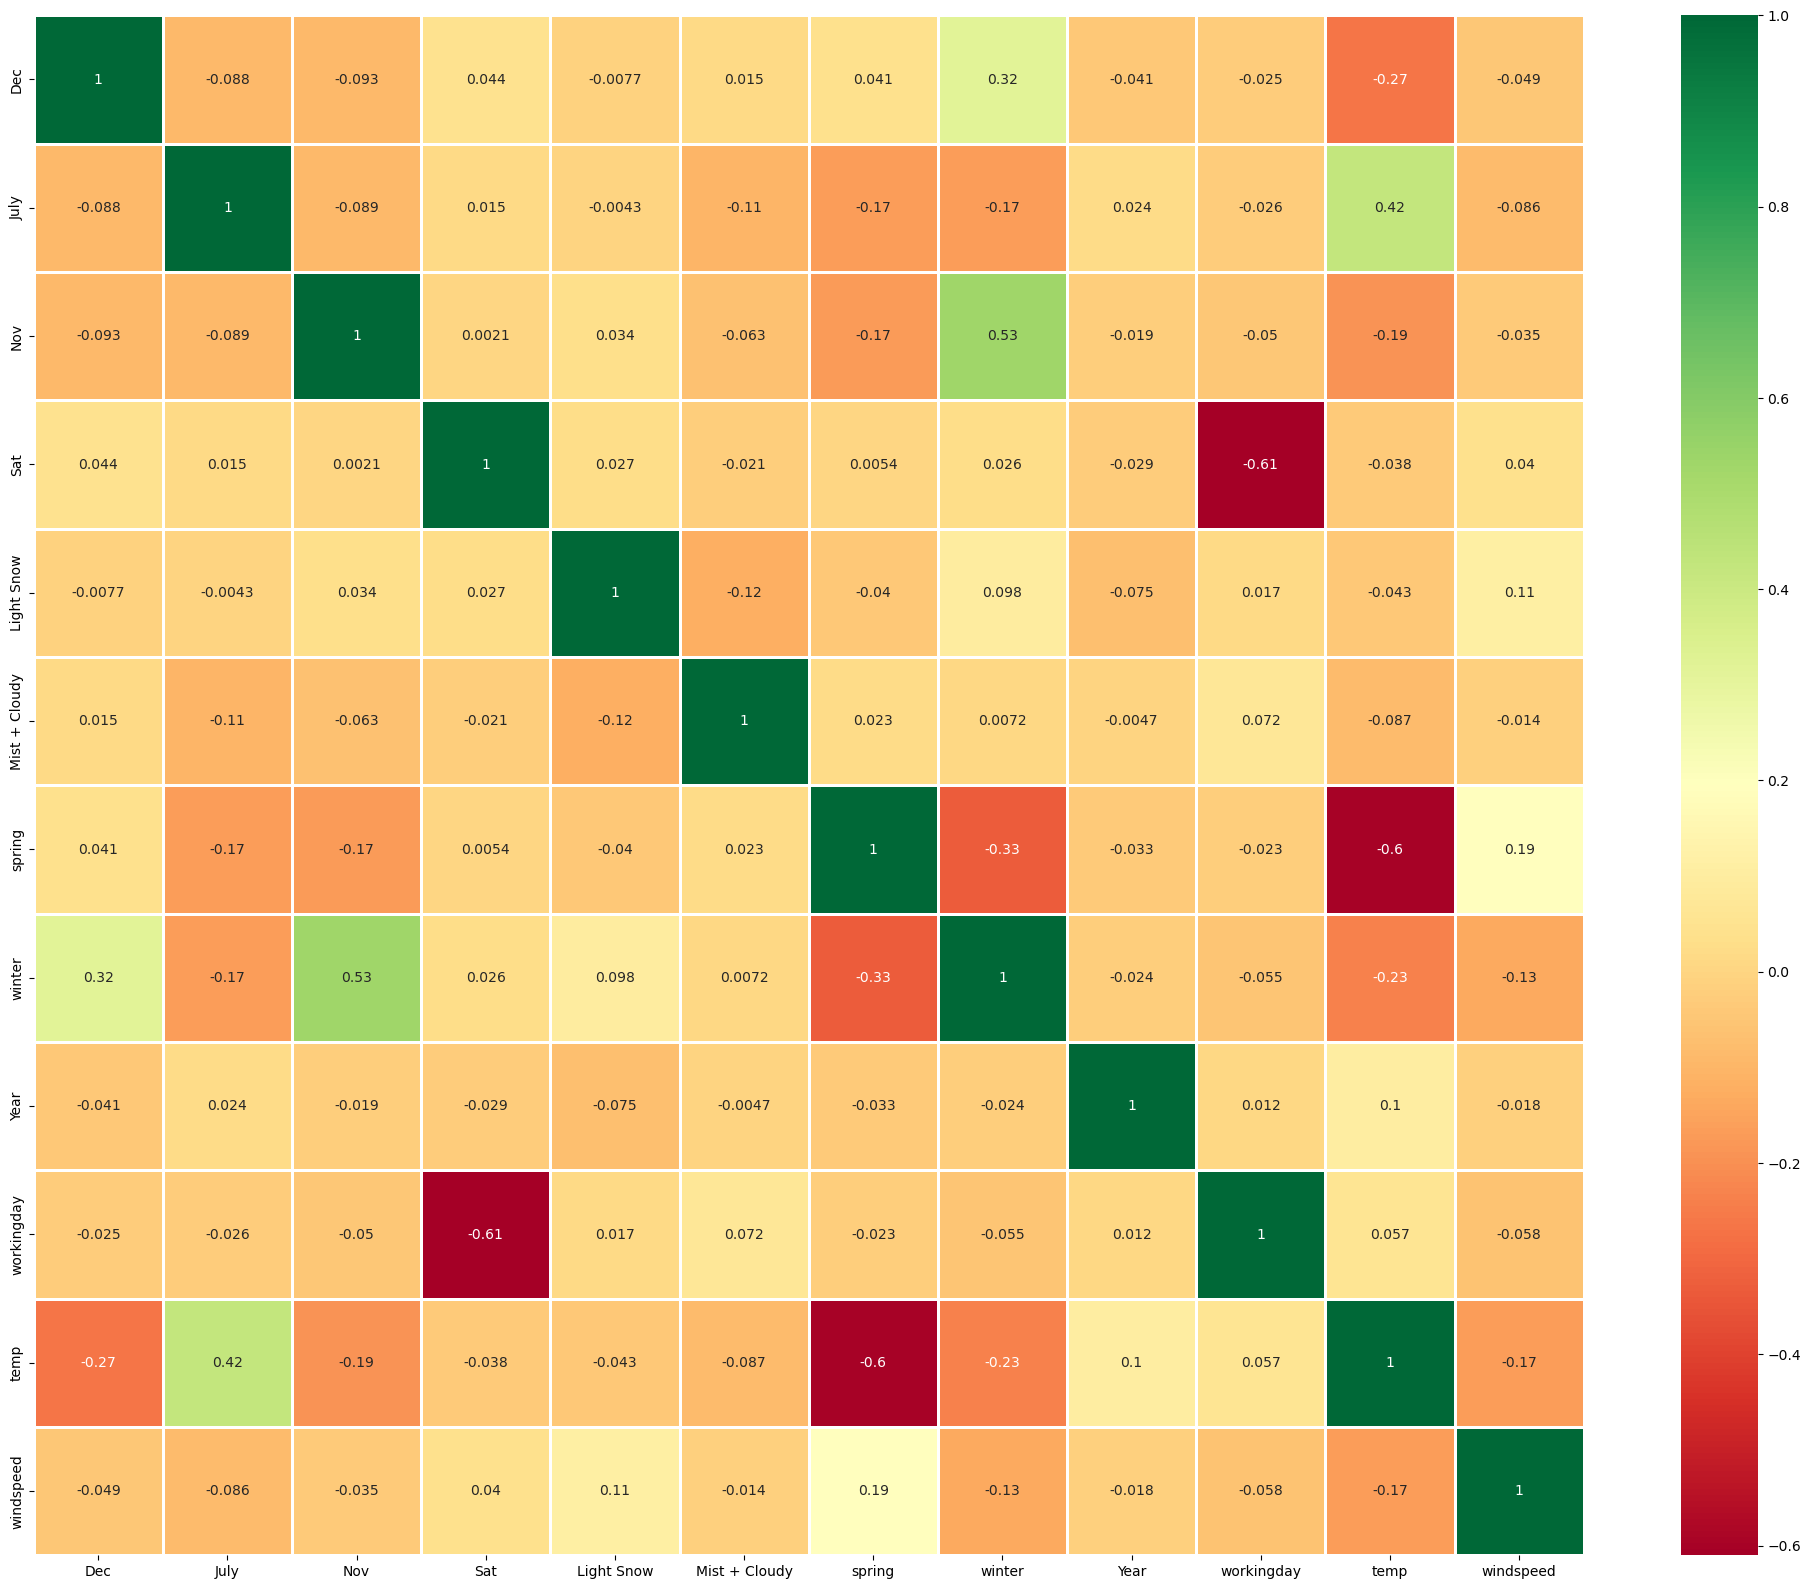

In [46]:
# heat map to check collinearity
plt.figure(figsize = (25,20))
ax= sns.heatmap(X_train_new3.corr(), annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

***Optmising for Business***
- here we remove the months which are highly corelated.
- the objective is to check practical variables which impacts the total count.
- Isolated paramaters with high corelations ( multi colinearity) are removed


In [47]:
# removing months - Nov, dec, July

X_train_new4 = X_train_new3.drop(['July','Dec','Nov'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new4)

,Features,VIF
7,temp,5.33
6,workingday,4.24
8,windspeed,4.16
5,Year,2.05
3,spring,1.85
0,Sat,1.75
2,Mist + Cloudy,1.54
4,winter,1.41
1,Light Snow,1.08


In [48]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new4)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     268.8
Date:                Sat, 22 Apr 2023   Prob (F-statistic):          1.94e-185
Time:                        08:43:46   Log-Likelihood:                 487.28
No. Observations:                 511   AIC:                            -954.6
Df Residuals:                     501   BIC:                            -912.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2406      0.026      9.401

**Model Intepretation**
- F Statistic : 268.8
- R Squared   : 0.823

**Linear Model**

**Count = 0.24+0.05(Sat)-0.28(Light Snow)-0.07(Mist+cloudy)-0.12(Spring)+0.04(Winter)+0.23(Year)+0.04(workingday)+0.4(Temp)-0.14(Windspeed)**

- The above model is pure stats model. 
- from a business POV, the model can be further reduced to a more readable one

**Model from Business POV**
- count = 0.24+0.4(Temp)+0.04(Winter)+0.04(workingday)-0.28(Lightsnow)-0.12(spring)

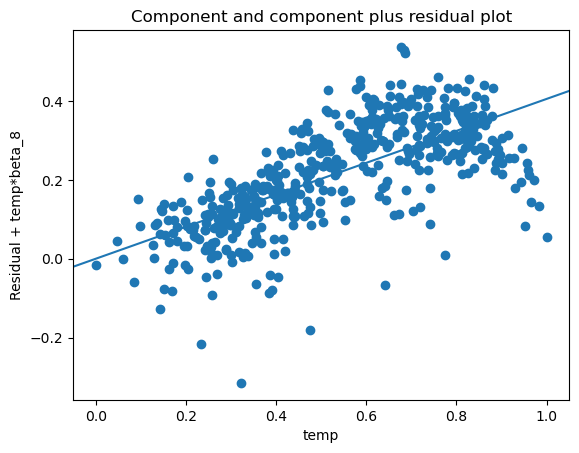

In [49]:
#checking Linear realtionship
sm.graphics.plot_ccpr(lr1, 'temp')
plt.show()

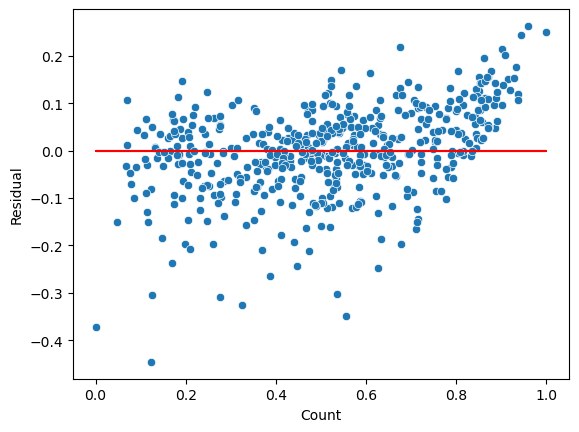

In [50]:
y_train_pred = lr1.predict(X_train_lm1)
residual = y_train - y_train_pred
sns.scatterplot(x=y_train,y=residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

- There are no patterns in residual values, so there is homoscedacity

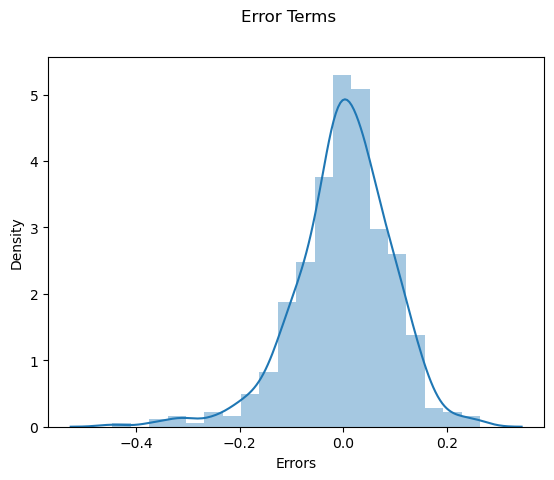

In [51]:
res = y_train-y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms')                  
plt.xlabel('Errors')                         
plt.show()

**Making predictions with Final Model**
- Here we apply scaler() and use transform and not fit or fit_transform
- we want to prevent the information leak from train to test dataset.

In [52]:
num_vars = ['temp', 'atemp', 'humidity', 'windspeed','count']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()


,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,summer,winter,Year,holiday,workingday,temp,atemp,humidity,windspeed,count
184,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706
535,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,1,0.784017,0.755582,0.711035,0.227262,0.782674
299,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382
221,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400
152,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029


In [53]:
y_test=bike_test.pop("count")
X_test=bike_test

In [54]:
#Selecting the variables that were part of final model.
col1=X_train_new4.columns

X_test=X_test[col1]

X_test

,Sat,Light Snow,Mist + Cloudy,spring,winter,Year,workingday,temp,windspeed
184,0,0,1,0,0,0,0,0.831783,0.084219
535,0,0,0,0,0,1,1,0.784017,0.227262
299,0,0,1,0,1,0,1,0.511964,0.334206
221,0,0,0,0,0,0,1,0.881625,0.339570
152,0,0,0,0,0,0,1,0.817246,0.537414
...,...,...,...,...,...,...,...,...,...
702,0,0,0,0,1,1,1,0.490158,0.086888
127,0,0,0,0,0,0,0,0.584649,0.069510
640,0,1,0,0,1,1,1,0.662528,0.133655
72,0,0,0,1,0,0,1,0.331557,0.203418


In [55]:
X_test.shape

(220, 9)

In [56]:
# Adding constant variable to test dataframe
X_test_lm1 = sm.add_constant(X_test)

X_test_lm1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          220 non-null    float64
 1   Sat            220 non-null    uint8  
 2   Light Snow     220 non-null    uint8  
 3   Mist + Cloudy  220 non-null    uint8  
 4   spring         220 non-null    uint8  
 5   winter         220 non-null    uint8  
 6   Year           220 non-null    int64  
 7   workingday     220 non-null    int64  
 8   temp           220 non-null    float64
 9   windspeed      220 non-null    float64
dtypes: float64(3), int64(2), uint8(5)
memory usage: 11.4 KB


***Making Predictions***

In [57]:
# Making predictions using the final model (lr1)

y_pred = lr1.predict(X_test_lm1)

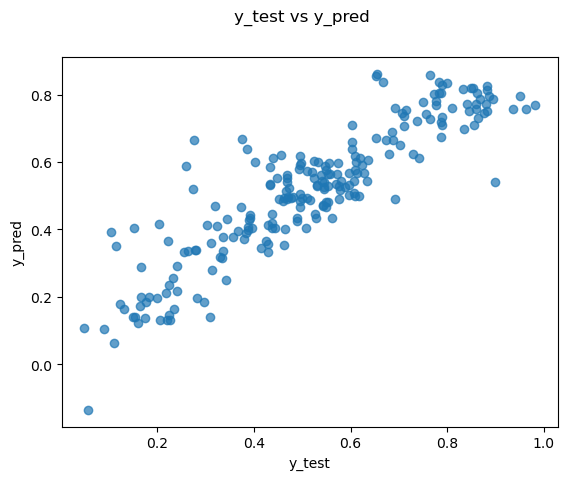

In [58]:
# plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred,alpha = 0.7)
fig.suptitle('y_test vs y_pred')             
plt.xlabel('y_test')                          
plt.ylabel('y_pred') 
plt.show()

***Calculating the R square***

In [59]:
r2 = round(r2_score(y_test, y_pred),4)
r2

0.7918

In [60]:
# n is number of rows in test dataset
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
adjusted_r2


0.7829

**Model Evaluation**
- R2 Value / Train Dataset  .828
- R2 Value / Test Dataset   .79

- Adjusted R2 Value / Train Dataset .825
- Adjusted R2 Value / Test Dataset  .78 